In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penyisihan-joints-data-competition-2023/sample_submission.csv
/kaggle/input/penyisihan-joints-data-competition-2023/train.csv
/kaggle/input/penyisihan-joints-data-competition-2023/test.csv


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt # For plotting pictures and graphs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy
import re
from sklearn.feature_selection import mutual_info_regression

In [3]:
# Exploratory Data Analysis (EDA)
train_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/train.csv", low_memory=False)

In [4]:
def encoding(data, kategori) : 
    # Menerapkan encoding pada data berdasarkan kategori
    data_encoded = np.zeros_like(data, dtype= int)
    for i in range(len(data)):
        if pd.isna(data[i]): 
            data_encoded[i] = -1
        else :    
            for j in range(len(kategori)):
                  if data[i] in kategori[j] :
                        data_encoded[i] = j+1
                        break

    return data_encoded

In [5]:
def encode_floors_before_eq(data):
    data_copy = deepcopy(data["floors_before_eq (total)"])
    floors_before_eq_key = {
        "two": 2,
        "Two": 2,
        "second": 2,
        "third": 3,
        "2": 2,
        "3": 3,
        "three": 3,
        "Three": 3,
        "one": 1,
        "1st": 1,
        "1": 1,
        "four": 4,
        "Four": 4,
        "4": 4,
        "6": 6,
        "fifth": 5,
        "Fifth": 5,
        "five": 5,
        "Five": 5,
        "7": 7,
        "8": 8,
        "9": 9
    }
    pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, floors_before_eq_key.keys())))

    data_copy = data_copy.str.findall(pattern).str[0]
    data_copy = data_copy.map(floors_before_eq_key)
    
    data_copy.fillna(-1)
    
    return data_copy

In [6]:
def encoding_to_int(data):
    data_encoded = np.zeros_like(data, dtype= int)
    for i in range(len(data)):
        if pd.isna(data[i]): 
            data_encoded[i] = -1
        else :    
            if data[i] == 'None':
                data_encoded[i] = 0
            else:
                data_encoded[i] = int(float(data[i]))
    return data_encoded

In [7]:
#Kategori_type_of_foundation
kategori_type_of_foundation = [['Bamboo or Timber', 'Bamboo/TImber', 'Bamboo/Timber'],
                               ['Clay Sand Mixed mortar-Stone/Brick'], ['Clay mortar-Stone/Brick'],
                               ['Cement-Stone or Cement-Brick','Cement-Stone/Brick'], 
                               ['Mud mortar-Stone/Brick'],
                               ['Reinforced Concrete', 'RC'],
                               ['Others', 'Other']]

#Kategori_type_of_roof
kategori_type_of_roof = [['Bamboo/Timber Light roof','Bamboo or Timber Light roof','Bamboo/TImber-Light Roof'], 
                         ['Wood Light Roof or Bamboo Light Roof'],
                         ['Wood Light Roof or Bamboo Heavy Roof'], 
                         ['Bamboo/Timber Heavy roof', 'Bamboo or Timber Heavy roof', 'Bamboo/TImber-Heavy Roof'],
                         ['Reinforced Brick Slab/rcc/rbc','reinforced cement concrete/rb/rbc', 'rcc/rb/rbc', 'Reinforced brick concrete/rcc/rbc']]

#Kategori_type_of_other_floor
kategori_type_of_other_floor = [['TImber/Bamboo-Mud','Timber Mud or Bamboo-Mud'],
                                ['Wood or Bamboo Mud', 'Wood-Mud or Bamboo Mud'],
                                ['Not applicable'],
                                ['Wood-Plank', 'Timber-Planck','Lumber-plank'],
                                ['rcc/rb/rbc','Reinforced brick concrete/rcc/rbc','reinforced cement concrete/rb/rbc' ]]

#Kategori_building_plan_configuration
kategori_building_plan_configuration = [['Rectangular'], ['Square'], ['L-shape'], ['T-shape'], ['Multi-projected'],
                                        ['U-shape'], ['Others'], ['E-shape'], ['Building with Central Courtyard'], ['H-shape']]

#Kategori_legal_ownership_status
kategori_legal_ownership_status = [['Private Use','Private', 'Prvt','Privste'],
                                   ['Public Space','Public','Public Use'],
                                   ['Institutionals','Institutional Use','Institutional'],
                                   ['Unknown','Unspecified','Other']]

#Kategori_industrial_use_type
kategori_industrial_use_type = [['Non-industrial'],['Metallurgy'], ['Service/Tourism'], ['Food'],
                                 ['Manufacturing'], ['Infrastructure'], ['Agro'], ['Farm'], ['Forest-based']]

#Kategori land_surface_condition
kategori_land_surface_condition = [['Flat'],['Moderate slope'],['Steep slope']]

#Kategori type_of_ground_floor
kategori_type_of_ground_floor = [['Clay'], 
                                 ['Mud', 'mud'], 
                                 ['soil, water, loam Mixed'], 
                                 ['Brick or Stone', 'brick/stone', 'Brick/Stone'], 
                                 ['Reinforced Concrete', 'reinforced concrete', 'RC'],
                                 ['Lumber', 'TImber', 'Timber', 'Wood'],
                                 ['Other']]

#Kategori position
kategori_position = [['Not attached'], 
                     ['Attached-1 side'], 
                     ['Attached-2 side'], 
                     ['Attached-3 side']]

#Kategori technical_solution_proposed
kategori_technical_solution_proposed = [['Reconstruction'], 
                                        ['Major repair'], 
                                        ['Minor repair'], 
                                        ['No need']]

#Kategori_govermental_use_type
kategori_govermental_use_type = [['Non-govermental'], 
                                 ['Police Offices'], 
                                 ['Govermental Buildings']] 

#Kategori public_place_type
kategori_public_place_type = [['Non-public'], ['Religious Sites'], ['Other Institutional Building'],
       ['Drugstore'], ['Health Clinics'], ['Shopping Sites'], ['Hospital'],
       ['High School'], ['University'], ['Middle School'], ['Primary School'],
       ['Recreational Park'], ['Museum']] 

#Kategori residential_type
kategori_residential_type = [['Non-residential'], 
                              ['Hotel/Motel'], 
                              ['Rental Residential'],
                              ['Housing'], 
                              ['Other', 'Other Residential Type']]

#Kategori flexible_structure
kategori_flexible_superstructure = [['unavailable'], ['available']] 

In [8]:
#Encode floors_before_eq
data_enc_floors_before_eq = encode_floors_before_eq(train_data)
data_enc_floors_before_eq = data_enc_floors_before_eq.fillna(-1)

#Encode plinth_area
data_enc_plinth_area = deepcopy(train_data["plinth_area (ft^2)"]).apply(
    lambda x: int(str(x)[:-4]) if isinstance(x, str) and x not in ["More than 1000 ft^2", ""] else (
        1001 if x == "More than 1000 ft^2" else x)
)

data_enc_plinth_area = data_enc_plinth_area.fillna(-1)

#Encode land_surface_condition
data_enc_land_surface_condition = pd.DataFrame(encoding(train_data['land_surface_condition'], kategori_land_surface_condition), columns=['enc_land_surface_condition'])

#Encode type_of_foundation
data_enc_type_of_foundation = pd.DataFrame(encoding(train_data['type_of_foundation'], kategori_type_of_foundation), columns=['enc_type_of_foundation'])

#Encode type_of_roof
data_enc_type_of_roof = pd.DataFrame(encoding(train_data['type_of_roof'], kategori_type_of_roof), columns = ['enc_type_of_roof'])

#Encode type_of_ground_floor
data_enc_type_of_ground_floor = pd.DataFrame(encoding(train_data['type_of_ground_floor'], kategori_type_of_ground_floor), columns=['enc_type_of_ground_floor'])

#Encode type_of_other_floor
data_enc_type_of_other_floor = pd.DataFrame(encoding(train_data['type_of_other_floor'], kategori_type_of_other_floor), columns = ['enc_type_of_other_floor'])

#Encode position
data_enc_position = pd.DataFrame(encoding(train_data['position'], kategori_position), columns=['enc_position'])

#Encode building_plan_configuration
data_enc_building_plan_configuration = pd.DataFrame (encoding(train_data['building_plan_configuration'], kategori_building_plan_configuration), columns = ['enc_building_plan_configuration'])

#Encode technical_solution_proposed
data_enc_technical_solution_proposed = pd.DataFrame(encoding(train_data['technical_solution_proposed'], kategori_technical_solution_proposed), columns=['enc_technical_solution_proposed'])

#Encode legal_ownership_status
data_enc_legal_ownership_status = pd.DataFrame(encoding(train_data['legal_ownership_status'], kategori_legal_ownership_status), columns = ['enc_legal_ownership_status'])

#Encode govermental_use_type
data_enc_govermental_use_type = pd.DataFrame(encoding(train_data['govermental_use_type'], kategori_govermental_use_type), columns=['enc_govermental_use_type'])

#Encode industrial_use_type
data_enc_industrial_use_type = pd.DataFrame(encoding(train_data['industrial_use_type'], kategori_industrial_use_type), columns = ['enc_industrial_use_type'])

#Encode type_of_reinforcement_concrete
data_enc_type_of_reinforcement_concrete = pd.DataFrame (encoding_to_int(train_data['type_of_reinforcement_concrete']), columns = ['type_of_reinforcement_concrete'])

#Encode no_family_residing
data_enc_no_family_residing = pd.DataFrame (encoding_to_int(train_data['no_family_residing']), columns = ['no_family_residing'])

#Encode industrial_use_type
data_enc_public_place_type = pd.DataFrame (encoding(train_data['public_place_type'], kategori_public_place_type), columns = ['enc_public_place_type'])

#Encode flexible_structure
data_enc_flexible_superstructure = pd.DataFrame(encoding(train_data['flexible_superstructure'], kategori_flexible_superstructure), columns = ['enc_flexible_superstructure'])

#Encode residential_type
data_enc_residential_type = pd.DataFrame(encoding(train_data['residential_type'], kategori_residential_type), columns = ['enc_residential_type'])


train_data["old_building"] = train_data["old_building"].fillna(-1)
data_old_building = pd.DataFrame(train_data["old_building"], columns = ['old_building'])

train_data["height_before_eq (ft)"] = train_data["height_before_eq (ft)"].fillna(-1)
data_height_before_eq = pd.DataFrame(train_data["height_before_eq (ft)"], columns = ['height_before_eq (ft)'])

train_data["has_secondary_use"] = train_data["has_secondary_use"].fillna(-1)
data_has_secondary_use = pd.DataFramer(train_data["has_secondary_use"], columns = ['has_secondary_use'])

train_data["type_of_reinforcement_concrete"] = train_data["type_of_reinforcement_concrete"].fillna(-1)
data_type_of_reinforcement_concrete = pd.DataFrame (train_data["type_of_reinforcement_concrete"], columns = ['type_of_reinforcement_concrete'])

train_data["wall_binding"] = train_data["wall_binding"].fillna(-1)
data_wall_binding = pd.DataFrame (train_data["wall_binding"], columns = ['wall_binding'])

train_data["wall_material"] = train_data["wall_material"].fillna(-1)
data_wall_material = pd.DataFrame (train_data["wall_material"], columns = ['wall_material'])

In [9]:
#Encoded Dataframe
data_encoded = pd.concat([train_data[train_data.columns[0]], 
                  data_enc_floors_before_eq, 
                  data_old_building,
                  data_enc_plinth_area,
                  data_height_before_eq,
                  data_enc_land_surface_condition,
                  data_enc_type_of_foundation,
                  data_enc_type_of_roof,
                  data_enc_type_of_ground_floor,
                  data_enc_type_of_other_floor,      
                  data_enc_position,
                  data_enc_building_plan_configuration,
                  data_enc_technical_solution_proposed,
                  data_enc_legal_ownership_status,
                  data_has_secondary_use,
                  data_type_of_reinforcement_concrete,
                  data_enc_residential_type,
                  data_enc_no_family_residing,
                  data_enc_public_place_type,
                  data_enc_govermental_use_type,
                  data_enc_industrial_use_type,
                  data_enc_flexible_superstructure,
                  data_wall_binding,
                  data_wall_material,
                  train_data['damage_grade']
                 ], axis="columns")
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722815 entries, 0 to 722814
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       722815 non-null  int64  
 1   floors_before_eq (total)         722815 non-null  float64
 2   old_building                     722815 non-null  float64
 3   plinth_area (ft^2)               722815 non-null  float64
 4   height_before_eq (ft)            722815 non-null  float64
 5   enc_land_surface_condition       722815 non-null  int64  
 6   enc_type_of_foundation           722815 non-null  int64  
 7   enc_type_of_roof                 722815 non-null  int64  
 8   enc_type_of_ground_floor         722815 non-null  int64  
 9   enc_type_of_other_floor          722815 non-null  int64  
 10  enc_position                     722815 non-null  int64  
 11  enc_building_plan_configuration  722815 non-null  int64  
 12  en

In [10]:
for col in data_encoded.columns:
    print("Lost feature {}:{}".format(col, data_encoded[col].isna().sum()))

Lost feature Unnamed: 0:0
Lost feature floors_before_eq (total):0
Lost feature old_building:0
Lost feature plinth_area (ft^2):0
Lost feature height_before_eq (ft):0
Lost feature enc_land_surface_condition:0
Lost feature enc_type_of_foundation:0
Lost feature enc_type_of_roof:0
Lost feature enc_type_of_ground_floor:0
Lost feature enc_type_of_other_floor:0
Lost feature enc_position:0
Lost feature enc_building_plan_configuration:0
Lost feature enc_technical_solution_proposed:0
Lost feature enc_legal_ownership_status:0
Lost feature has_secondary_use:0
Lost feature type_of_reinforcement_concrete:0
Lost feature enc_residential_type:0
Lost feature no_family_residing:0
Lost feature enc_public_place_type:0
Lost feature enc_govermental_use_type:0
Lost feature enc_industrial_use_type:0
Lost feature enc_flexible_superstructure:0
Lost feature wall_binding:0
Lost feature wall_material:0
Lost feature damage_grade:0


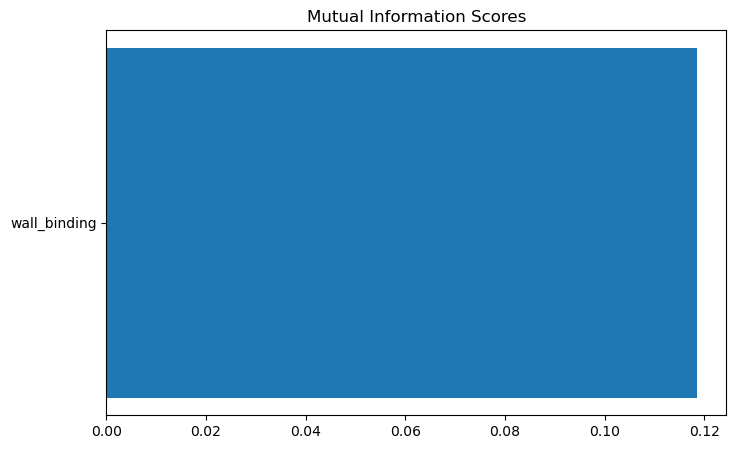

In [20]:
#Feature Mutual Information to damage_grade
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
for colname in data_encoded.select_dtypes("object"):
    data_encoded[colname], _ = data_encoded[colname].factorize()
    
X = data_encoded[['wall_binding', 'damage_grade']]
y = X.pop('damage_grade')

mi_scores = make_mi_scores(X, y)
plt.figure(dpi=100, figsize=(8, 5))

plot_mi_scores(mi_scores.head(20))